<h1>Titolo</h1>
<h2>Studio di cose che faremo</h2>

In [73]:
#importiamo le librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#importiamo il dataset
dataset = pd.read_csv('mymoviedb.csv', lineterminator='\n')

#visualizziamo il dataset a livello strutturale
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [74]:
#visualizziamo le prime righe del dataset per avere una visione più pratica
dataset.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [75]:
#vediamo i datatype delle colonne
dataset.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count            object
Vote_Average          object
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

<h2>Pulizia del dataset</h2>

In [76]:
#troviamo i valori nulli nel dataset
dataset.isnull().sum()

Release_Date          0
Title                 9
Overview              9
Popularity           10
Vote_Count           10
Vote_Average         10
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [77]:
#eliminiamo i valori nulli di "title" 
dataset = dataset.dropna(subset=['Title'])
#visualizziamo le modifiche
dataset.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           1
Vote_Count           1
Vote_Average         1
Original_Language    1
Genre                2
Poster_Url           2
dtype: int64

Abbiamo notato che i valori nulli sono scesi drasticamente perchè tutti legati alle righe con titoli nulli. Ora, dato che rimangono poche righe con valori nulli, riteniamo sia legittimo rimuoverle direttamente perchè poco influenti 

In [78]:
#Quindi adesso togliamo le righe con valori nulli
dataset = dataset.dropna()


Adesso controlliamo se ci sono valori duplicati e nel caso li eliminiamo 

In [79]:
#controlliamo se ci sono valori duplicati
dataset.duplicated().sum()

0

Come possiamo vedere, non sono presenti valori duplicati

In [80]:
#convertiamo il datatype di 'Vote_count e 'Vote_average' in float, per poter visualizzarli con describe
dataset['Vote_Count'] = dataset['Vote_Count'].astype(int, copy=False)
dataset['Vote_Average'] = dataset['Vote_Average'].astype(float, copy=False)
dataset.describe()
dataset.dtypes

Release_Date          object
Title                 object
Overview              object
Popularity           float64
Vote_Count             int32
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
dtype: object

<h3>Andiamo vedere il range temporale in cui sono stati pubblicati i film

In [81]:
#vediamo il titolo delfilm meno recente e il più recente
dataset.Release_Date = pd.to_datetime(dataset.Release_Date)
min_date = dataset['Release_Date'].min()
max_date = dataset['Release_Date'].max()

print('Il film meno recente è:', dataset[dataset['Release_Date'] == min_date]['Title'].values[0], ', uscito il', min_date.date())
print('Il film più recente è:', dataset[dataset['Release_Date'] == max_date]['Title'].values[0], ', uscito il', max_date.date())

dataset.dtypes

Il film meno recente è: A Trip to the Moon , uscito il 1902-04-17
Il film più recente è: Despicable Me 4 , uscito il 2024-07-03


Release_Date         datetime64[ns]
Title                        object
Overview                     object
Popularity                  float64
Vote_Count                    int32
Vote_Average                float64
Original_Language            object
Genre                        object
Poster_Url                   object
dtype: object

Come possiao notare, nel database sono presenti dei film che non sono ancora usciti ma hanno già una data di pubblicazione ufficiale

<h2>Visualizzazione dei dati, in cerca di correlazioni</h2>

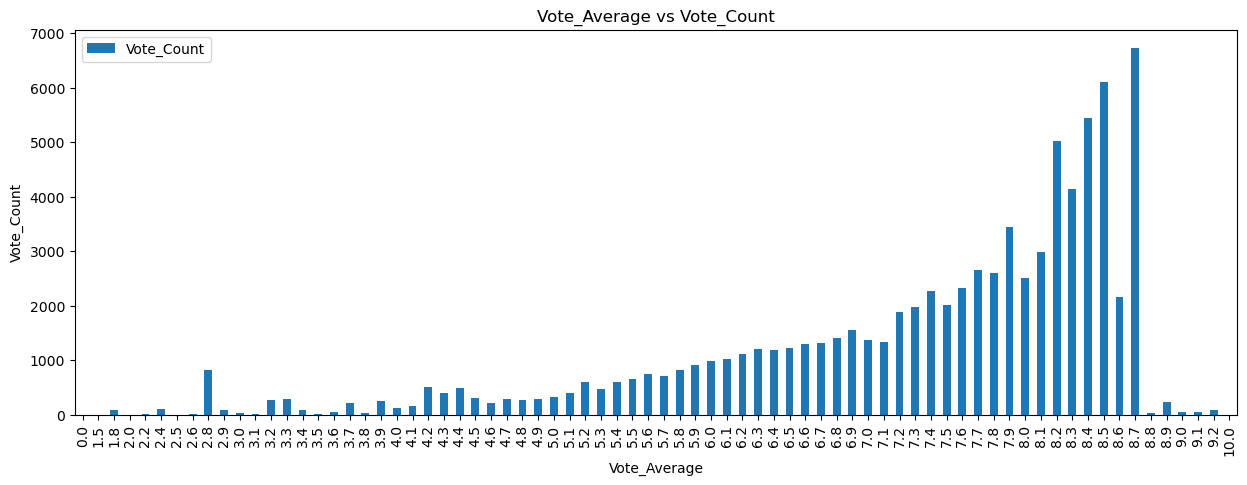

In [82]:
#visualizzazione di 'Vote_Average' e 'Vote_Count'
pivot = dataset.pivot_table(index='Vote_Average', values='Vote_Count', aggfunc='mean')
pivot.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Vote_Average')
plt.ylabel('Vote_Count')
plt.title('Vote_Average vs Vote_Count')
plt.show()

Per poter quantizzare la popolarità la visuaizziamo a grafico

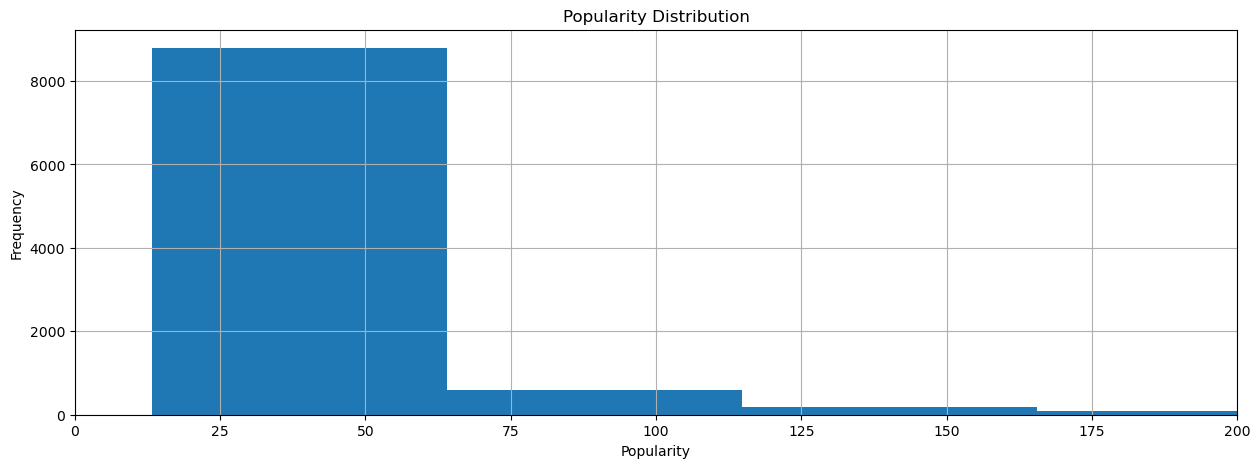

In [83]:
#visuallizziamo la distribuzione di 'Popularity'
histo = dataset['Popularity'].hist(bins=100, figsize=(15, 5))
plt.xlim(0, 200) #limitiamo l'asse y per una migliore visualizzazione
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.show()

Quantizzazione delle date di uscita
1. VERY OLD = [1900, 1980]
2. OLD = [1981, 2000]
3. RECENT = [2001, 2015]
4. VERY RECENT = [2016, 2024]

Quantizziamo anche i voti
1. BAD = [0, 4.9]
2. SUFFICIENT = [5, 5.9]
3. GOOD = [6, 6.9]
4. VERY GOOD = [7, 7.9]
5. EXCELLENT = [8, 10]

Quantizziamo anche popularity
1. NOT POPULAR = [0 ,39.9] 
2. AVARAGE = [40, 59.9]
3. POPULAR = [60, 199.9]
4. BLOCKBUSTER = [200, 5084]

In [84]:
dataset.dtypes

Release_Date         datetime64[ns]
Title                        object
Overview                     object
Popularity                  float64
Vote_Count                    int32
Vote_Average                float64
Original_Language            object
Genre                        object
Poster_Url                   object
dtype: object

In [85]:

quantize_release_date = ['VERY OLD', 'OLD', 'RECENT', 'VERY-RECENT']
minimum = [1900, 1981, 2001, 2016]
maximum = [1980, 2000, 2015, 2024]

dataset.Release_Date = pd.to_datetime(dataset.Release_Date)
dataset.dtypes
for i in range(4):
    dataset.loc[dataset['Release_Date'].dt.year.between(minimum[i], maximum[i]), 'Quant_Release_Date'] = quantize_release_date[i]

#visualizziamo la nuova colonna
print(dataset['Quant_Release_Date'])


0       VERY-RECENT
1       VERY-RECENT
2       VERY-RECENT
3       VERY-RECENT
4       VERY-RECENT
           ...     
9832       VERY OLD
9833    VERY-RECENT
9834    VERY-RECENT
9835    VERY-RECENT
9836            OLD
Name: Quant_Release_Date, Length: 9826, dtype: object


In [86]:
#Quantizziamo la colonna 'Vote_Average'
quantize_vote_average = ['VERY BAD', 'BAD', 'AVERAGE', 'GOOD', 'VERY GOOD']
minimum = [0, 5, 6, 7, 8]
maximum = [4.9, 5.9, 6.9, 7.9, 10]


for i in range(5):
    dataset.loc[dataset['Vote_Average'].between(minimum[i], maximum[i]), 'quant_vote_average'] = quantize_vote_average[i]


In [87]:
#Quantizziamo la colonna 'Popularity'
quantize_popularity = ['NOT POPULAR', 'AVARAGE', 'POPULAR', 'BLOCKBUSTER']
minimum = [0, 40, 60, 200]
maximum = [39.9, 59.9, 199.9, 5084]

for i in range(4):
    dataset.loc[dataset['Popularity'].between(minimum[i], maximum[i]), 'quant_popularity'] = quantize_popularity[i]
    


In [88]:
#rimuoviamo le colonne 'Vote_Average', 'Vote_Count', 'Popularity' e 'Poster_Url'
#dataset = dataset.drop(['Vote_Average', 'Vote_Count', 'Popularity', 'Poster_Url', 'Overview'], axis=1)
dataset.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.128250,146.000000,5.900000
50%,2011-09-12 00:00:00,21.195000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.879332,2611.303856,1.129797
